In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("classroom_actions.csv")

In [14]:
data.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [15]:
data.describe()

,id,total_days
count,3829.000000,3829.000000
mean,558788.794724,74.105511
std,215527.500503,22.400106
min,182951.000000,1.000000
25%,375055.000000,58.000000
50%,560227.000000,74.000000
75%,741535.000000,91.000000
max,937032.000000,135.000000


# 1)Make initial assumption #

### Null Hypothesis: average completion rate  for 'experiment' is smaller than or equal to the average completion rate for 'control' ###
##### Null Hypothesis: Avg(Experiment.completed)-Avg(control.completed) <=0 #####

### Alternative Hypothesis: average completion rate  for 'experiment' is bigger than the average completion rate for 'control' ###
##### Alternative Hypothesis: Avg(Experiment.completed)-Avg(control.completed) > 0 #####

# 2)Gather Data #

### Group 'experiment' completion rate = len(completed) / len(all) ###

In [41]:
comp_experiment = data.query("group == 'experiment'and completed == True")
comp_experiment.sample(5)

,timestamp,id,group,total_days,completed
1317,2015-10-04 13:15:45.120477,831056,experiment,93,True
146,2015-08-16 18:05:33.246828,638893,experiment,91,True
2774,2015-12-06 00:44:29.065453,472585,experiment,100,True
421,2015-08-28 17:15:19.975863,819129,experiment,114,True
2596,2015-11-28 03:16:32.500295,406749,experiment,84,True


In [42]:
all_experiment = data.query("group == 'experiment'")
all_experiment.sample(5)

,timestamp,id,group,total_days,completed
196,2015-08-19 00:50:39.329924,363216,experiment,73,True
2773,2015-12-06 00:02:07.452008,337718,experiment,65,False
857,2015-09-16 13:44:22.337463,539548,experiment,60,False
308,2015-08-23 18:20:25.087628,502525,experiment,62,False
2102,2015-11-06 10:14:48.605772,321412,experiment,74,False


In [30]:
comp_rate_experiment = len(comp_experiment) / len(all_experiment)
comp_rate_experiment  

0.3935334872979215

### Group 'control' completion rate = len(completed) / len(all) ###

In [40]:
comp_control = data.query("group == 'control'and completed == True")
comp_control.sample(5)

,timestamp,id,group,total_days,completed
1582,2015-10-16 04:27:19.506315,309160,control,102,True
1134,2015-09-26 18:55:06.238950,793927,control,94,True
1599,2015-10-16 19:16:26.463754,698934,control,100,True
3278,2015-12-27 21:31:24.158829,698472,control,99,True
1533,2015-10-14 04:45:22.056463,559449,control,87,True


In [39]:
all_control = data.query("group == 'control'")
all_control.sample(5)

,timestamp,id,group,total_days,completed
2078,2015-11-05 08:43:20.612847,588490,control,61,True
1475,2015-10-11 16:17:48.789879,842233,control,122,True
3823,2016-01-19 09:14:30.737835,613816,control,63,False
1663,2015-10-19 18:17:14.294952,867075,control,98,False
2537,2015-11-25 08:38:17.820872,266492,control,101,True


In [33]:
comp_rate_control = len(comp_control) / len(all_control)
comp_rate_control  

0.3719951923076923

# 2.1) Calculate Observed value #
# (difference between both rates) #

In [44]:
#the observable difference in one instance (on the whole population)
observed_difference = comp_rate_experiment - comp_rate_control
observed_difference

0.02153829499022919

In [56]:
#creating a population of the difference by re-running the experiment over and over again
difference = []
for _ in range(4000):
    sample = data.sample(100, replace = True)
    sample_C_rate_experiment = len(sample.query("group == 'experiment'and completed == True")) / len(sample.query("group == 'experiment'"))
    sample_C_rate_control = len(sample.query("group == 'control'and completed == True")) / len(sample.query("group == 'control'"))
    sample_c_diff = sample_C_rate_experiment - sample_C_rate_control
    difference.append(sample_c_diff)

In [47]:
print(np.array(difference).mean())
difference[:20]

0.020131102555906347


[0.23232323232323232,
 -0.07303141574867406,
 0.138752052545156,
 -0.03945249597423511,
 -0.058292282430213505,
 0.03676470588235292,
 0.0485516115871073,
 0.168081494057725,
 -0.12364945978391356,
 0.0907944514501891,
 0.05769230769230771,
 -0.13749490004079967,
 0.05252525252525253,
 0.15833333333333333,
 0.11616370400992143,
 0.16459253311922925,
 0.07291666666666669,
 -0.015295576684580425,
 0.01999184006527943,
 -0.03741067675493903]

(array([   8.,   61.,  242.,  577.,  911., 1010.,  707.,  360.,  105.,
          19.]),
 array([-0.30844156, -0.24448052, -0.18051948, -0.11655844, -0.0525974 ,
         0.01136364,  0.07532468,  0.13928571,  0.20324675,  0.26720779,
         0.33116883]),
 <BarContainer object of 10 artists>)

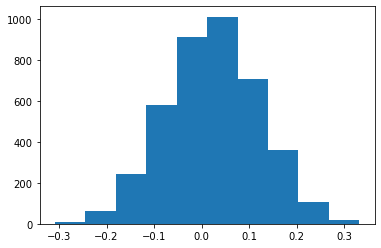

In [53]:
#the observable difference's population is a normal distribution (Law)
plt.hist(difference)

## 2.2)Calculate The Null Hypothesis (Normal curve, average difference is 0) ##

(array([1.000e+00, 1.500e+01, 7.500e+01, 3.420e+02, 8.050e+02, 1.134e+03,
        8.920e+02, 5.180e+02, 1.780e+02, 4.000e+01]),
 array([-0.40072054, -0.33012424, -0.25952794, -0.18893164, -0.11833533,
        -0.04773903,  0.02285727,  0.09345357,  0.16404987,  0.23464618,
         0.30524248]),
 <BarContainer object of 10 artists>)

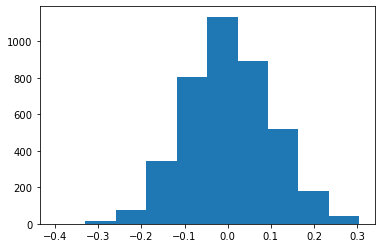

In [54]:
diff = np.array(difference)
normal = np.random.normal(0,diff.std(),diff.size)   #(center,standard deviation,size)
plt.hist(normal)

## Plotting the Null hypothesis mean ( = 0) on the difference population distribution ##

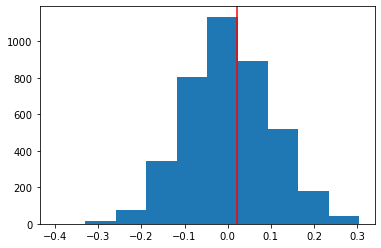

In [55]:
plt.hist(normal)
plt.axvline(x = observed_difference, c = "red")

## 2.3)Calucating the P value ##

## P value: probability of the Null hypothesis is Right/Wrong ##
### P < 5% or 0.05 ==> the Null hypothesis is wrong, adopt the alternative hypothesis ###
### P >= 5% or 0.05 ==> the Null hypothesis is right, keep current state ###

In [52]:
p_value =(observed_difference>normal).mean()
p_value

0.596

# === Conclution, Null hypothesis is right, keep current state === #